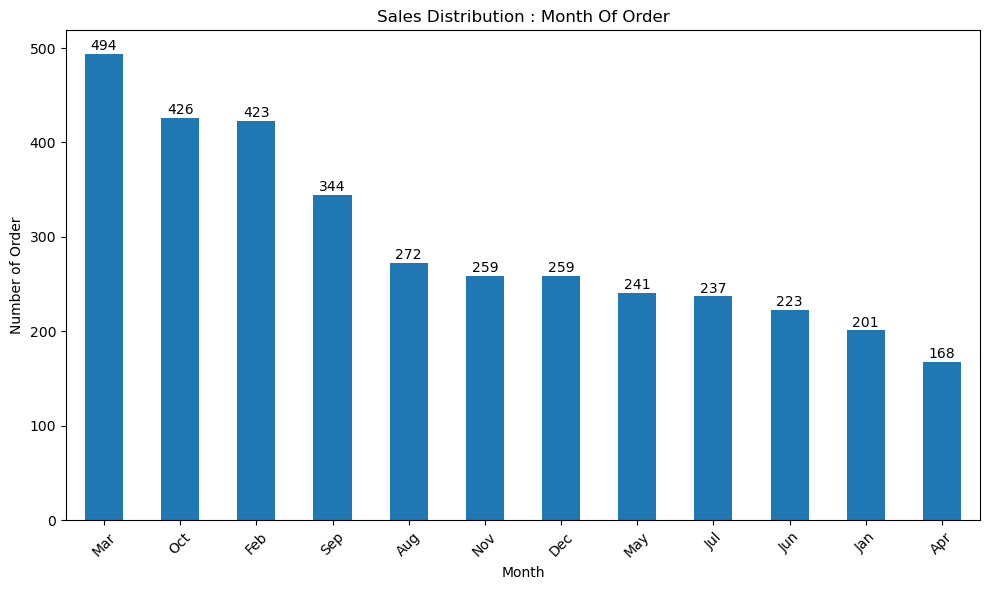

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Exploratory Data Analysis (EDA) - Bar Chart Sales Distribution : Month Of Order
df = pd.read_csv("Coffe_sales.csv")

# Dataset
top_context = df['Month_name'].value_counts()

# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_context.plot(kind='bar')
# Add label
for i, value in enumerate(top_context):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Sales Distribution : Month Of Order")
plt.xlabel("Month")
plt.ylabel("Number of Order")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

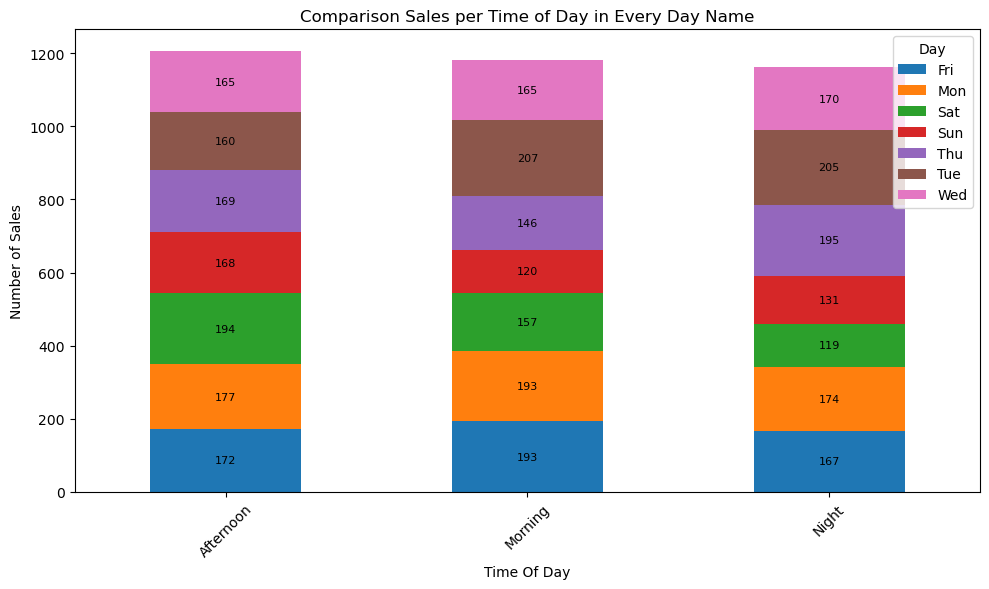

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
# Exploratory Data Analysis (EDA) - Stacked Bar Chart Comparison Sales per Time of Day in Every Day Name
df = pd.read_csv("Coffe_sales.csv")

# Count bookings per interval separated by Day Name
time_counts = df.groupby(["Time_of_Day", "Weekday"], observed=False).size().unstack(fill_value=0)

# Stacked Bar Chart
plt.figure(figsize=(10, 6))
ax = time_counts.plot(kind="bar", stacked=True, ax=plt.gca())
# Add label for each stack
for i, (index, row) in enumerate(time_counts.iterrows()):
    cumulative = 0
    for payment_type, value in row.items():
        if value > 0:
            plt.text(i, cumulative + value / 2, str(value),
                     ha='center', va='center', fontsize=8, color="black")
            cumulative += value
plt.title("Comparison Sales per Time of Day in Every Day Name")
plt.xlabel("Time Of Day")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.legend(title="Day")
plt.tight_layout()
plt.show()

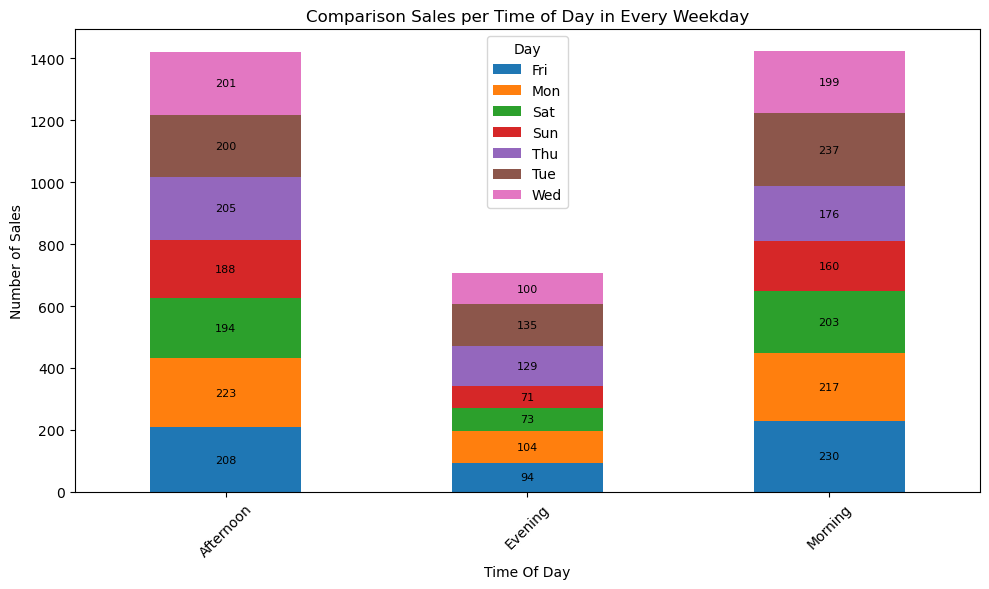

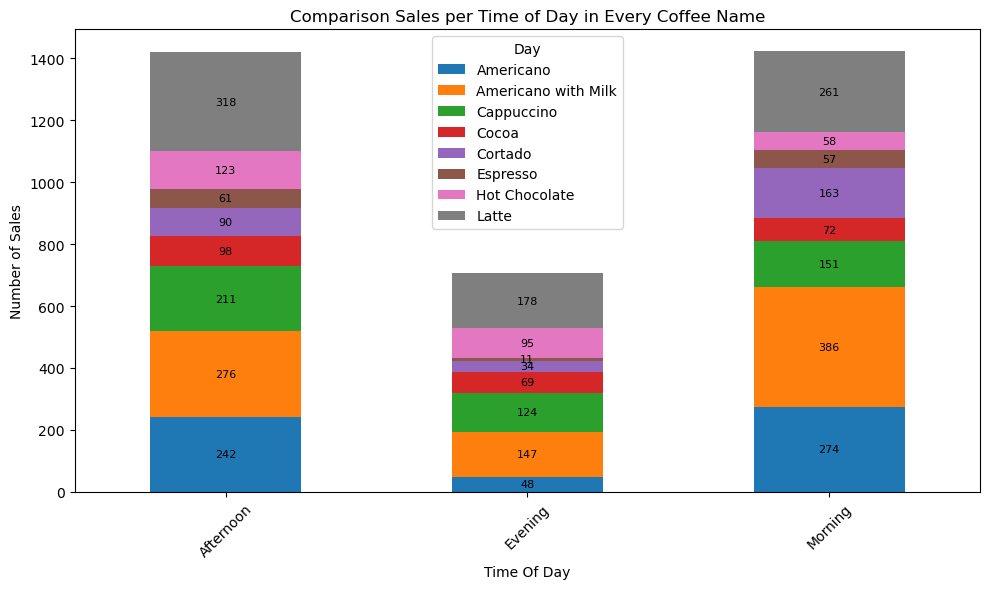

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
# Exploratory Data Analysis (EDA) - Stacked Bar Chart Comparison Sales per Time of Day in Every Day Of Order / Coffee Name
df = pd.read_csv("Coffe_sales.csv")

# Categorize Time Of Order
def categorize_day(val):
    if val <= 12:
        return "Morning"
    elif val > 12 and val <= 18:
        return "Afternoon"
    else:
        return "Evening"

df["Time Category"] = df["hour_of_day"].apply(categorize_day)

# Count bookings per interval separated by Time Of Order / Coffee Name
target_col = ["Weekday","coffee_name"]
for dt in target_col:
    time_counts = df.groupby(["Time Category", dt], observed=False).size().unstack(fill_value=0)
    
    # Stacked Bar Chart
    plt.figure(figsize=(10, 6))
    ax = time_counts.plot(kind="bar", stacked=True, ax=plt.gca())
    # Add label for each stack
    for i, (index, row) in enumerate(time_counts.iterrows()):
        cumulative = 0
        for payment_type, value in row.items():
            if value > 0:
                plt.text(i, cumulative + value / 2, str(value),
                         ha='center', va='center', fontsize=8, color="black")
                cumulative += value
    plt.title(f"Comparison Sales per Time of Day in Every {dt.replace("_"," ").title()}")
    plt.xlabel("Time Of Day")
    plt.ylabel("Number of Sales")
    plt.xticks(rotation=45)
    plt.legend(title="Day")
    plt.tight_layout()
    plt.show()